In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
X_var=[]
Y_var=[]
for k in range(1, 100):
    x = k + 15
    X_var.append(x + np.random.normal(loc=0.0, scale=4.0))
    Y_var.append(x * 1.5 + np.random.normal(loc=0.0, scale=4.0))


regr_data = pd.DataFrame(list(zip(X_var, Y_var)), columns=["X", "Y"])

print(regr_data)

             X           Y
0    22.535996   24.845353
1    15.843475   22.290207
2    20.870215   28.385788
3    21.373623   32.557291
4    14.518454   26.733678
..         ...         ...
94  117.344555  167.704476
95  106.507162  160.988043
96  110.841542  164.270551
97  109.146370  173.979480
98  110.401555  171.859948

[99 rows x 2 columns]


In [45]:
regr_model=smf.ols(formula="Y~X",data =regr_data ).fit()
regr_data["Y_pred"]=regr_model.predict()
regr_data["Residual"]=regr_data["Y"] - regr_data["Y_pred"] #محاسبهٔ باقیمانده‌ها (Residuals) در مدل رگرسیون خطی به شما کمک می‌کند تا بفهمید که مدل شما چقدر به درستی داده‌ها را توضیح می‌دهد یا به عبارتی دیگر، چقدر مدل شما با داده‌های واقعی هماهنگ است.
std_res=regr_data["Residual"].std() #  در اینجا انحراف از معیار باقیمانیده ها محسابه میشود . اگر این مقدار بزرگ باشد نشان میدهد این مدل پیش بینی هایی کرده است که از مدل واقعی بسیار دور است 
#ارزیابی عملکرد مدل: با تحلیل باقیمانده‌ها می‌توانید به طور کلی بفهمید که مدل شما چقدر به درستی داده‌ها را توضیح می‌دهد.
# اگر باقیمانده‌ها به طور معمول به صورت تصادفی پخش شده باشند و بدون الگوی قابل تشخیص باشند، این نشان می‌دهد که مدل شما به درستی داده‌ها را توضیح می‌دهد.
regr_data["standardized_red"]=regr_data["Residual"]/std_res
print(regr_data)



# مقایسهٔ باقیمانده‌ها در ابعاد معیاری یکسان: با استفاده از باقیمانده‌های استاندارد، می‌توانید مقادیر باقیمانده‌ها را در یک مقیاس معیاری یکسان قرار دهید. این امر به شما این امکان را می‌دهد که بین داده‌های مختلف با استفاده از انحراف معیار یکسان مقایسه کنید.

# شناسایی داده‌های پرت و نقاط نامعمول: اگر باقیمانده‌های استاندارد بیشتر از یک یا کمتر از منفی یک باشند، این نشان می‌دهد که داده مربوطه به میزان قابل توجهی از میانگین اجتماعی پرت است و ممکن است نقطه‌ای نامعمول باشد.

# در نتیجه، با تقسیم باقیمانده‌ها بر انحراف معیار، می‌توانید مقادیری استانداردی را برای باقیمانده‌ها به دست آورید که قابل مقایسه بین داده‌ها و مدل‌های مختلف باشد و به شما کمک کند تا نقاط نامعمول و داده‌های پرت را شناسایی کنید.

print(regr_model.summary())



# از خروجی نتایج رگرسیون OLS که ارائه دادید، می‌توانید اطلاعات زیادی درباره‌ی مدل خود و اینکه چقدر خوب داده‌ها را توضیح می‌دهد بدست آورید. در اینجا به تفصیل توضیح می‌دهیم:

# 1. **R-squared**: مقدار R-squared برابر با 0.969 است که نشان می‌دهد 96.9٪ از تغییرات در متغیر وابسته \( Y \) توسط مدل توضیح داده شده است. این مقدار بالا نشان‌دهنده‌ی این است که مدل به خوبی داده‌ها را توضیح می‌دهد.

# 2. **Adj. R-squared**: مقدار Adjusted R-squared نیز 0.969 است که تقریباً برابر با R-squared است و نشان می‌دهد که مدل به خوبی داده‌ها را توضیح می‌دهد و تعداد متغیرهای مستقل مدل (در اینجا فقط \( X \)) به خوبی انتخاب شده است.

# 3. **F-statistic و Prob (F-statistic)**: مقدار F-statistic برابر با 3081 و مقدار احتمال آن (Prob (F-statistic)) برابر با 2.62e-75 است. این مقادیر نشان می‌دهند که مدل به طور کلی بسیار معنادار است (چون مقدار احتمال بسیار کوچکتر از 0.05 است).

# 4. **Coefficients (ضریب‌ها)**:
#    - Intercept: مقدار ضریب برش \( \text{Intercept} \) برابر با 1.2151 است که نشان می‌دهد وقتی \( X \) صفر باشد، مقدار پیش‌بینی شده‌ی \( Y \) برابر با 1.2151 خواهد بود.
#    - \( X \): مقدار ضریب \( X \) برابر با 1.4965 است که نشان می‌دهد با افزایش یک واحد در \( X \)، مقدار \( Y \) به طور میانگین 1.4965 واحد افزایش می‌یابد. این ضریب بسیار معنادار است چون مقدار احتمال (P>|t|) آن برابر با 0.000 است.

# 5. **Standard Error (خطای استاندارد)**:
#    - برای \( \text{Intercept} \) خطای استاندارد 1.901 است.
#    - برای \( X \) خطای استاندارد 0.027 است که نسبت به مقدار ضریب آن بسیار کوچک است، بنابراین ضریب \( X \) بسیار دقیق است.

# 6. **Durbin-Watson**: مقدار Durbin-Watson برابر با 1.851 است. این مقدار به طور تقریبی نشان می‌دهد که خودهمبستگی در باقیمانده‌ها وجود ندارد (مقدار 2 نشان‌دهنده عدم خودهمبستگی است).

# 7. **Omnibus و Prob(Omnibus)**، **Jarque-Bera (JB) و Prob(JB)**، **Skew** و **Kurtosis**: این آمارها به شما در بررسی نرمال بودن باقیمانده‌ها کمک می‌کنند. مقادیر احتمال بالا برای آزمون‌های Omnibus و Jarque-Bera نشان می‌دهد که فرضیه نرمال بودن باقیمانده‌ها رد نمی‌شود (چون مقادیر احتمال بزرگتر از 0.05 هستند).

# 8. **Cond. No.**: مقدار Condition Number برابر با 176 است که نشان‌دهنده عدم وجود مشکلات چندخطی (Multicollinearity) جدی در مدل است (مقدار بالا می‌تواند نشان‌دهنده مشکلات چندخطی باشد).

# ### خلاصه:
# مدل رگرسیون خطی شما به خوبی داده‌ها را توضیح می‌دهد (R-squared بالا)، ضریب \( X \) بسیار معنادار است و باقیمانده‌ها به طور کلی نرمال به نظر می‌رسند و خودهمبستگی جدی در باقیمانده‌ها وجود ندارد. با این حال، برای اطمینان بیشتر باید نمودارهای باقیمانده‌ها را نیز بررسی کنید که در سوال قبلی ارائه شده بودند.

             X           Y      Y_pred   Residual  standardized_red
0    22.535996   24.845353   33.927919  -9.082566         -1.402955
1    15.843475   22.290207   24.062164  -1.771957         -0.273709
2    20.870215   28.385788   31.472313  -3.086525         -0.476766
3    21.373623   32.557291   32.214411   0.342880          0.052964
4    14.518454   26.733678   22.108888   4.624790          0.714377
..         ...         ...         ...        ...               ...
94  117.344555  167.704476  173.689608  -5.985132         -0.924504
95  106.507162  160.988043  157.713704   3.274339          0.505777
96  110.841542  164.270551  164.103215   0.167336          0.025848
97  109.146370  173.979480  161.604284  12.375196          1.911557
98  110.401555  171.859948  163.454610   8.405337          1.298346

[99 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.978
Mod

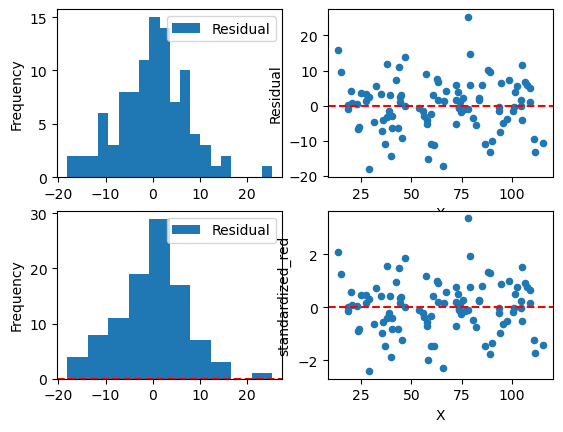

In [23]:
import matplotlib.pyplot as plt

fig, ((hist1, res_X2), (res_X3, res_X4)) = plt.subplots(2, 2)

regr_data.plot(y='Residual', kind='hist', bins=20, ax=hist1)

regr_data.plot('X', 'Residual', kind='scatter', ax=res_X2)
res_X2.axhline(y=0.0, c='red', linestyle='dashed')

regr_data.plot('Y_pred', 'Residual', kind='hist',ax=res_X3)
res_X3.axhline(y=0.0, c='red', linestyle='dashed')

regr_data.plot('X', 'standardized_red', kind='scatter', ax=res_X4)
res_X4.axhline(y=0.0, c='red', linestyle='dashed')

plt.show()

برای تحلیل نمودارها و بررسی مدل رگرسیون خود، باید به چند مورد توجه کنید:

1. **نمودار هیستوگرام باقیمانده‌ها**:
   - نمودار هیستوگرام باقیمانده‌ها (Residuals) در قسمت بالا سمت چپ و پایین سمت چپ نمایش داده شده‌اند.
   - توزیع باقیمانده‌ها باید به یک توزیع نرمال نزدیک باشد. اگر باقیمانده‌ها به طور یکنواخت و بدون الگوی مشخصی توزیع شده باشند، این نشان می‌دهد که مدل شما به درستی داده‌ها را توضیح می‌دهد. در نمودار هیستوگرام باقیمانده‌ها، باید به دنبال شکلی شبیه به زنگوله باشید.

2. **نمودار پراکنش باقیمانده‌ها در مقابل متغیر مستقل (X)**:
   - این نمودار در قسمت بالا سمت راست نمایش داده شده است.
   - باقیمانده‌ها باید به صورت تصادفی و بدون الگوی خاصی پراکنده باشند. اگر الگوی خاصی در این نمودار دیده شود، ممکن است نشان‌دهنده‌ی عدم همگنی واریانس یا وجود روابط غیرخطی بین متغیر مستقل و وابسته باشد.

3. **نمودار هیستوگرام باقیمانده‌ها در مقابل مقادیر پیش‌بینی شده (Y_pred)**:
   - این نمودار در قسمت پایین سمت چپ نمایش داده شده است.
   - مشابه هیستوگرام باقیمانده‌ها، باقیمانده‌ها باید به صورت تصادفی و بدون الگوی خاصی پراکنده باشند و توزیع نرمال داشته باشند.

4. **نمودار پراکنش باقیمانده‌های استاندارد شده در مقابل متغیر مستقل (X)**:
   - این نمودار در قسمت پایین سمت راست نمایش داده شده است.
   - باقیمانده‌های استاندارد شده نیز باید به صورت تصادفی و بدون الگوی خاصی پراکنده باشند. اگر الگوی خاصی در این نمودار دیده شود، ممکن است نیاز به مدل پیچیده‌تری باشد.

با توجه به این نمودارها، شما می‌توانید بررسی کنید که آیا باقیمانده‌ها به صورت تصادفی پراکنده شده‌اند یا الگوی خاصی دارند. اگر باقیمانده‌ها به صورت تصادفی و بدون الگوی مشخصی پراکنده باشند، این نشان می‌دهد که مدل شما به درستی داده‌ها را توضیح می‌دهد.

در صورت وجود الگوهای خاص در باقیمانده‌ها، ممکن است نیاز به تغییر مدل یا اضافه کردن متغیرهای جدید باشد. همچنین، بررسی دقیق‌تر نتایج آماری مدل (مانند R-squared، مقادیر p و ...) می‌تواند به شما در تحلیل بهتر کمک کند.